**İlke DERCAN**


# 1. Veri Hikayesi/Tanımı


    Veriler Portekizli bir bankacılık kurumunun doğrudan pazarlama kampanyalarıyla ilgilidir. Pazarlama kampanyaları telefon görüşmelerine dayanıyordu. Çoğu zaman, ürüne (banka vadeli mevduat) abone olunup olunmayacağına ('evet') veya abone olunmayacağına ('hayır') erişmek için aynı müşteriyle birden fazla iletişim kurulması gerekiyordu.

    Dört veri kümesi vardır: 
    1) tüm örnekleri (41188) ve 20 girişi içeren, tarihe göre sıralanmış (Mayıs 2008'den Kasım 2010'a kadar) bank-additional-full.csv, [Moro ve diğerleri, 2014]'te analiz edilen verilere çok yakındır.
    2) örneklerin %10'unu (4119), 1) arasından rastgele seçilen ve 20 girişi içeren bank-additional.csv.
    3) tüm örnekleri ve 17 girişi içeren, tarihe göre sıralanmış bank-full.csv (bu veri kümesinin daha az girişli eski sürümü). 
    4) örneklerin %10'unu ve 17 girişi içeren bank.csv, 3'ten rastgele seçilmiştir (bu veri kümesinin daha az girişli eski sürümü). En küçük veri kümeleri, hesaplama açısından daha zorlu makine öğrenimi algoritmalarını (ör. SVM) test etmek için sağlanır.

    Sınıflandırmanın amacı, müşterinin bir vadeli mevduata (y değişkeni) abone olup olmayacağını (evet/hayır) tahmin etmektir.

    Proje ödevi için Mayıs 2008'den Kasım 2010'a kadar olan tüm örnekleri içeren veriseti kullanılmıştır.

1- age (sayısal)

2 - job: işin türü (kategorik: "yönetici.", "bilinmeyen", "işsiz", "yönetim", "hizmetçi", "girişimci", "öğrenci", "mavi yakalı", "serbest meslek sahibi", "emekli", "teknisyen", "hizmetler")

3 - marital: medeni durumu (kategorik: "evli", "boşanmış", "bekar"; not: "boşanmış" boşanmış veya dul anlamına gelir)

4 – education: (kategorik: "bilinmiyor", "ikincil", "ilköğretim", "üçüncül")

5 - default : kredi temerrütte mi? (ikili: "evet", "hayır")

6 - balance: avro cinsinden ortalama yıllık bakiye (sayısal)

7- housing: konut kredisi var mı? (ikili: "evet", "hayır")

8 - loan: bireysel krediniz var mı? (ikili: "evet", "hayır")

mevcut kampanyanın son iletişim kişisiyle ilgili:

9 - contact: iletişim iletişim türü (kategorik: "bilinmeyen", "telefon", "cep telefonu")

10 - day: ayın son iletişim günü (sayısal)

11 - month: yılın son iletişim ayı (kategorik: "ocak", "şubat", "mar", ..., "kasım", "aralık")

12 - duration: saniye cinsinden son temas süresi (sayısal)

diğer özellikler:

13 - campaign: bu kampanya sırasında ve bu müşteri için gerçekleştirilen iletişim sayısı (sayısal, son iletişimi içerir)

14 - pdays: önceki bir kampanyadan müşteriyle son iletişime geçildikten sonra geçen gün sayısı (sayısal, -1, müşteriyle daha önce iletişime geçilmediği anlamına gelir)

15 - previous: bu kampanyadan önce ve bu müşteri için gerçekleştirilen iletişim sayısı (sayısal)

16 - poutcome: önceki pazarlama kampanyasının sonucu (kategorik: "bilinmiyor", "diğer", "başarısızlık", "başarı")

Çıkış değişkeni (istenen hedef):

17 - y - müşteri vadeli mevduata abone oldu mu? (ikili: "evet", "hayır")

In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Statistics")
Pkg.add("MLDataUtils")
Pkg.add("Impute")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

using DataFrames
using CSV
using MLDataUtils
using Impute
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = RequestError: HTTP/2 301 (Cert verify failed: BADCERT_NOT_TRUSTED) while requesting https://pkg.julialang.org/registries
└ @ Pkg.Registry ~/julia-1.9.3/share/julia/stdlib/v1.9/Pkg/src/Registry/Registry.jl:69
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
Precompiling project...
  ✓ Libmount_jll
  ✓ OpenSSL_jll
  ✓ Rmath_jll
  ✓ Xorg_libICE_jll
  ✓ libpng_jll
  ✓ JpegTurbo_jll
  ✓ XZ_jll
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ libaom_jll
  ✓ Libgpg_error_jll
  ✓ Zstd_jll
  ✓ Expat_jll
  ✓ LZO_jll
  ✓ FriBidi_jll
  ✓ FreeType2_jll
  ✓ Libuuid_jll
  ✓ XML2_jll
  ✓ MultivariateStats
  ✓ NearestNeighbors
  ✓ OpenSSL
  ✓ Rmath
  ✓ SpecialFunctions
  ✓ Xorg_libSM_jll
  ✓ Libgcrypt_jll
  ✓ Libtiff_jll
  ✓ Fontconfig_jll
  ✓ Gettext_jll
  ✓ Wayland_jll
  ✓ Clustering
  ✓ StatsFuns
  ✓ ColorVectorSpace → SpecialFunctionsExt
  ✓ XSLT_jll
  ✓ Glib_jll
  ✓ HTTP
  ✓ StatsMo

In [2]:
bank= CSV.read("/home/ilke/Downloads/bank-full.csv", DataFrame)
df= CSV.read("/home/ilke/Downloads/bank-full.csv", DataFrame)
bank.y_numeric = ifelse.(bank.y .== "yes", 1, 0)

45211-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0
 0

# 2. Veri Önişleme ve Keşifsel Veri Analizi

In [3]:
show(describe(bank,:all),allrows=true, allcols=true)

18×13 DataFrame
 Row │ variable   mean      std       min       q25     median  q75     max      nunique  nmissing  first       last          eltype   
     │ Symbol     Union…    Union…    Any       Union…  Union…  Union…  Any      Union…   Int64     Any         Any           DataType 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ age        40.9362   10.6188   18        33.0    39.0    48.0    95                       0  58          37            Int64
   2 │ job                            admin.                            unknown  12              0  management  entrepreneur  String15
   3 │ marital                        divorced                          single   3               0  married     married       String15
   4 │ education                      primary                           unknown  4               0  tertiary    secondary     String15
   5 │ default                        n

In [4]:
nrow(bank), ncol(bank)

(45211, 18)

In [5]:
first(bank,10 )

,age,job,marital,education,default,balance,housing,loan,contact
,Int64,String15,String15,String15,String3,Int64,String3,String3,String15
1,58,management,married,tertiary,no,2143,yes,no,unknown
2,44,technician,single,secondary,no,29,yes,no,unknown
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown
5,33,unknown,single,unknown,no,1,no,no,unknown
6,35,management,married,tertiary,no,231,yes,no,unknown
7,28,management,single,tertiary,no,447,yes,yes,unknown
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown
9,58,retired,married,primary,no,121,yes,no,unknown


In [6]:
describe(bank)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,40.9362,18,39.0,95,0,Int64
2,job,,admin.,,unknown,0,String15
3,marital,,divorced,,single,0,String15
4,education,,primary,,unknown,0,String15
5,default,,no,,yes,0,String3
6,balance,1362.27,-8019,448.0,102127,0,Int64
7,housing,,no,,yes,0,String3
8,loan,,no,,yes,0,String3
9,contact,,cellular,,unknown,0,String15


In [7]:
describe(bank,:nmissing)  #eksik veri yok

,variable,nmissing
,Symbol,Int64
1,age,0
2,job,0
3,marital,0
4,education,0
5,default,0
6,balance,0
7,housing,0
8,loan,0
9,contact,0


In [8]:
for col in [:job, :marital, :education, :default, :housing, :loan, :contact, :month, :poutcome, :y]
    classes = unique(bank[!, col])
    df[!, col] .= map(x -> findfirst(isequal(x), classes), bank[!, col])
end

show(df, allcols=true)   #kategorik değişkenler için label encoding(etiketleme)

45211×17 DataFrame
   Row │ age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  y     
       │ Int64  Int64  Int64    Int64      Int64    Int64    Int64    Int64  Int64    Int64  Int64  Int64     Int64     Int64  Int64     Int64     Int64 
───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │    58      1        1          1        1     2143        1      1        1      5      1       261         1     -1         0         1      1
     2 │    44      2        2          2        1       29        1      1        1      5      1       151         1     -1         0         1      1
     3 │    33      3        1          2        1        2        1      2        1      5      1        76         1     -1         0         1      1
     4 │    47      4        1          3        1     1506 

In [9]:
job_counts = combine(groupby(bank, :job), nrow => :count)

sort!(job_counts, :count, rev=true)

,job,count
,String15,Int64
1,blue-collar,9732
2,management,9458
3,technician,7597
4,admin.,5171
5,services,4154
6,retired,2264
7,self-employed,1579
8,entrepreneur,1487
9,unemployed,1303


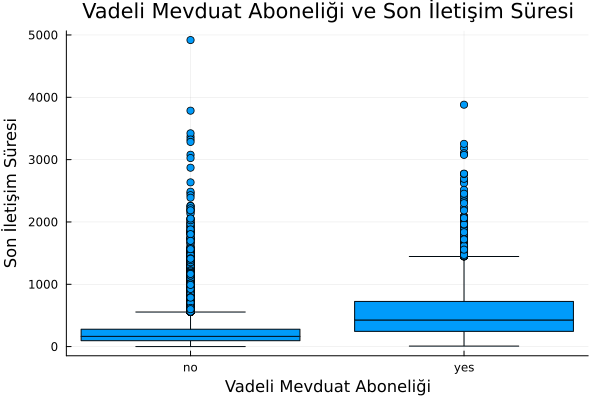

In [10]:
@df bank boxplot(:y, :duration, legend=false, title="Vadeli Mevduat Aboneliği ve Son İletişim Süresi", xlabel="Vadeli Mevduat Aboneliği", ylabel="Son İletişim Süresi")

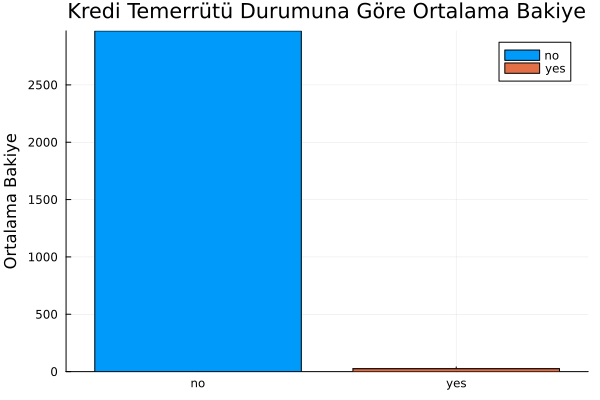

In [11]:
@df bank groupedbar(:default, :balance, group=:default, ylabel="Ortalama Bakiye", title="Kredi Temerrütü Durumuna Göre Ortalama Bakiye", agg=:mean, bar_position=:stack)

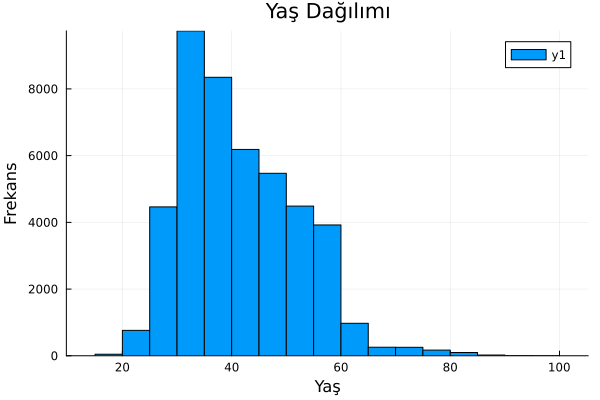

In [12]:
histogram(bank[:, :age], bins = 20, xlabel = "Yaş", ylabel = "Frekans", title = "Yaş Dağılımı")

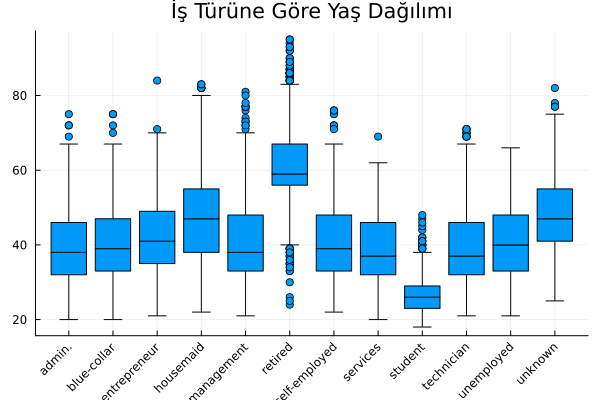

In [13]:
@df bank boxplot(:job, :age, legend=false, title="İş Türüne Göre Yaş Dağılımı",xrotation=45)

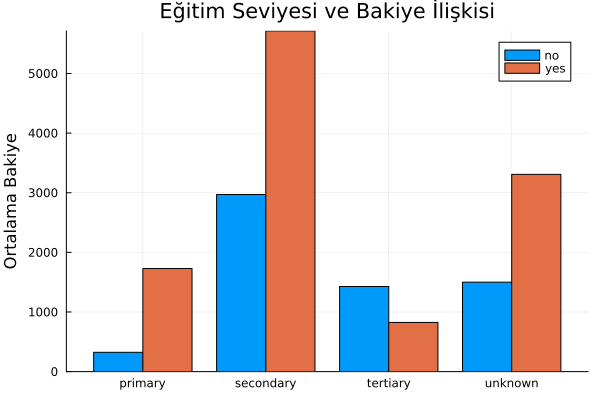

In [14]:
@df bank groupedbar(
    :education,
    :balance,
    group=:y,
    ylabel="Ortalama Bakiye",
    title="Eğitim Seviyesi ve Bakiye İlişkisi",
    bar_position=:dodge
)

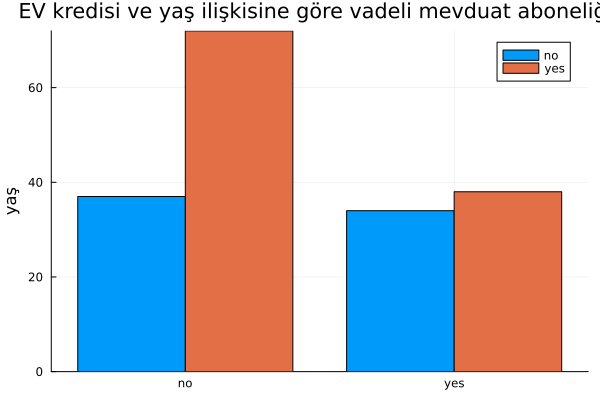

In [15]:
@df bank groupedbar(
    :housing,
    :age,
    group=:y,
    ylabel="yaş",
    title="EV kredisi ve yaş ilişkisine göre vadeli mevduat aboneliği ",
    bar_position=:dodge
)

In [16]:
using CSV
# Veriyi CSV dosyasına kaydetme
CSV.write("/home/ilke/Downloads/processed_data.csv", df)

"/home/ilke/Downloads/processed_data.csv"